In [38]:
import os
import sys
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
sys.path.append("..")
result_dir = "outputs/gen_log/"
results = os.listdir(result_dir)
# st = time.time()
result_list = []
col = ["instance_name", "knapsack_num", "objf", "objValue","GA_method","run_time","run_generation"]
for file in results:
    df = pd.read_csv(result_dir + file, header=0, index_col=0)
    result_list.append(df)
df_all_data = pd.concat(result_list,axis=1)
df_all_data = df_all_data.T
# df_all_data.columns = col
# et = time.time()
# print(st - et)

In [67]:
import os
import sys
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline
sys.path.append("..")
result_dir = "outputs/gen_log/"
results = os.listdir(result_dir)
res = results[2]
col = ["instance_name", "knapsack_num", "objf", "objValue","GA_method","run_time","run_generation"]
df = pd.read_csv(result_dir + res, header=1, index_col=0)
df_genlog = df[7:].reset_index(drop = True)
df

,Z_r_200_25_1,Z_r_200_25_1.1,Z_r_200_25_1.2,Z_r_200_25_1.3,Z_r_200_25_1.4,Z_r_200_25_1.5,Z_r_200_25_1.6,Z_r_200_25_1.7,Z_r_200_25_1.8,Z_r_200_25_1.9,Z_r_200_25_1.10,Z_r_200_25_1.11
0,,,,,,,,,,,,
1,3,3,3,3,5,5,5,5,10,10,10,10
2,1,3,1,3,1,3,1,3,1,3,1,3
3,92700.0,28918.0,89486.0,28582.0,62555.0,10958.0,62188.0,10757.0,39019.0,2752.0,42192.0,2721.0
4,base,base,tugba,tugba,base,base,tugba,tugba,base,base,tugba,tugba
5,264.20720887184143,249.82098531723022,192.7128348350525,233.92653727531433,341.3924865722656,333.6037576198578,443.61590600013733,513.999579668045,555.7717323303223,539.7306632995605,1338.3514158725739,1494.74361038208
...,...,...,...,...,...,...,...,...,...,...,...,...
1002,92700.0,28918.0,89486.0,28582.0,62555.0,10958.0,62188.0,10757.0,39019.0,2752.0,42192.0,2721.0
1003,92700.0,28918.0,89486.0,28582.0,62555.0,10958.0,62188.0,10757.0,39019.0,2752.0,42192.0,2721.0
1004,92700.0,28918.0,89486.0,28582.0,62555.0,10958.0,62188.0,10757.0,39019.0,2752.0,42192.0,2721.0


In [85]:
df.iloc[:,[0]]

,Z_r_200_25_1
0,
1,3
2,1
3,92700.0
4,base
5,264.20720887184143
...,...
1002,92700.0
1003,92700.0
1004,92700.0


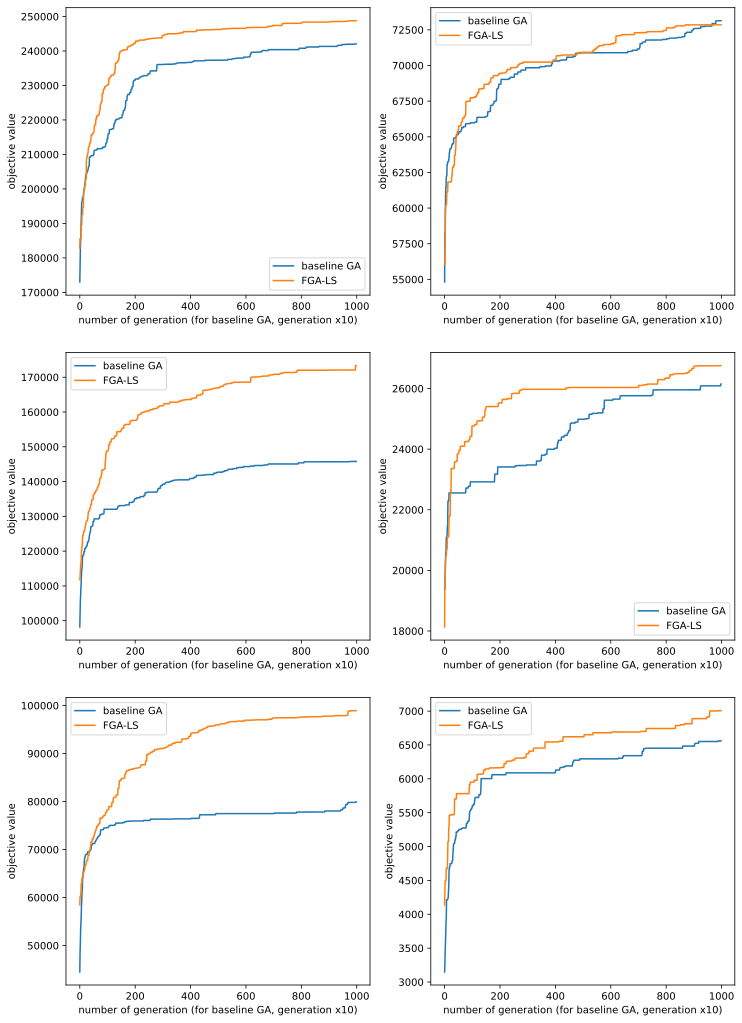

In [93]:
res = results[3]
col = ["instance_name", "knapsack_num", "objf", "objValue","GA_method","run_time","run_generation"]
df = pd.read_csv(result_dir + res, header=1, index_col=0)
df_genlog = df[7:].reset_index(drop = True)
plt.figure(figsize=(12, 18))
for i in range(3):
    col_base_1 = i*4
    col_base_3 = col_base_1+1
    col_FGA_1 = col_base_1+2
    col_FGA_3 = col_base_1+3
    #obj1
    plt.subplot(3,2,i*2+1)
    tugba_data =  np.array(df_genlog.iloc[:,[col_base_1]].astype(float))
    base_data = np.array(df_genlog.iloc[:,[col_FGA_1]].astype(float))
    l_tugba = plt.plot(tugba_data, label='l1')
    l_base = plt.plot(base_data, label='l2')
    plt.legend(labels=['baseline GA','FGA-LS'],loc='best')
    plt.xlabel('number of generation (for baseline GA, generation x10)')
    plt.ylabel('objective value')

    #obj3
    plt.subplot(3,2,i*2+2)
    tugba_data =  np.array(df_genlog.iloc[:,[col_base_3]].astype(float))
    base_data = np.array(df_genlog.iloc[:,[col_FGA_3]].astype(float))
    l_tugba = plt.plot(tugba_data, label='l1')
    l_base = plt.plot(base_data, label='l2')
    plt.legend(labels=['baseline GA','FGA-LS'],loc='best')
    plt.xlabel('number of generation (for baseline GA, generation x10)')
    plt.ylabel('objective value')


In [3]:
df_all_data['objValue'] = df_all_data['objValue'].astype(float)
cut1 = df_all_data[df_all_data["GA_method"] == 'base'].copy(deep=True)
cut2 = df_all_data[df_all_data["GA_method"] == 'tugba'].copy(deep=True)
cut1 = cut1.reset_index(drop = True)
cut2 = cut2.reset_index(drop = True)
df_comapredate = cut1.copy(deep=True)
df_comapredate["objValue"] = (cut2["objValue"]-cut1["objValue"]+0.01)/(cut1["objValue"]+0.01)
df_comapredate = df_comapredate.drop(columns = ["GA_method","run_generation", "run_time"])

In [4]:
df_comapredate

,instance_name,knapsack_num,objf,objValue
0,Z_r_100_25_1,3,1,-0.045105
1,Z_r_100_25_1,3,3,-0.012864
2,Z_r_100_25_1,5,1,0.078051
3,Z_r_100_25_1,5,3,0.023632
4,Z_r_100_25_1,10,1,0.049008
5,Z_r_100_25_1,10,3,0.091560
6,Z_r_100_75_1,3,1,0.013644
7,Z_r_100_75_1,3,3,-0.034258
8,Z_r_100_75_1,5,1,0.116350
9,Z_r_100_75_1,5,3,0.024871


In [12]:
# compare between instances according to items number
log = []
comp_data = df_comapredate[df_comapredate['instance_name'].str.contains('Z_r_300_')]
objfs = ["1","3","(0.5, 0.5, 0)", "(0.5, 0, 0.5)", "(0.5, 0.5, 0)"]
for objf in objfs:
    value1 = sum((comp_data["objf"] == objf) & (comp_data["objValue"]>0.05))/(comp_data["objf"] == objf).shape[0]
    value2 = sum((comp_data["objf"] == objf) & (comp_data["objValue"]<-0.05))/(comp_data["objf"] == objf).shape[0]
    log.append(("items", objf, value1, value2))
pd.DataFrame(log)

,0,1,2,3
0,items,1,0.333333,0.0
1,items,3,0.166667,0.0
2,items,"(0.5, 0.5, 0)",0.000000,0.0
3,items,"(0.5, 0, 0.5)",0.000000,0.0
4,items,"(0.5, 0.5, 0)",0.000000,0.0


In [16]:
# compare between instances according to joint values
log = []
comp_data = df_comapredate[df_comapredate['instance_name'].str.contains('0_75_')]
objfs = ["1","3","(0.5, 0.5, 0)", "(0.5, 0, 0.5)", "(0.5, 0.5, 0)"]
for objf in objfs:
    value1 = sum((comp_data["objf"] == objf) & (comp_data["objValue"]>0.05))/(comp_data["objf"] == objf).shape[0]
    value2 = sum((comp_data["objf"] == objf) & (comp_data["objValue"]<-0.05))/(comp_data["objf"] == objf).shape[0]
    log.append(("dense", objf, value1, value2))
pd.DataFrame(log)

,0,1,2,3
0,dense,1,0.333333,0.0
1,dense,3,0.083333,0.0
2,dense,"(0.5, 0.5, 0)",0.000000,0.0
3,dense,"(0.5, 0, 0.5)",0.000000,0.0
4,dense,"(0.5, 0.5, 0)",0.000000,0.0


In [19]:
# compare between instances according to knapsack number
log = []
comp_data = df_comapredate[df_comapredate['knapsack_num']=="3"]
objfs = ["1","3","(0.5, 0.5, 0)", "(0.5, 0, 0.5)", "(0.5, 0.5, 0)"]
for objf in objfs:
    value1 = sum((comp_data["objf"] == objf) & (comp_data["objValue"]>0.05))/(comp_data["objf"] == objf).shape[0]
    value2 = sum((comp_data["objf"] == objf) & (comp_data["objValue"]<-0.05))/(comp_data["objf"] == objf).shape[0]
    log.append(("knapsacks", objf, value1, value2))
pd.DataFrame(log)

,0,1,2,3
0,knapsacks,1,0.0,0.0
1,knapsacks,3,0.0,0.0
2,knapsacks,"(0.5, 0.5, 0)",0.0,0.0
3,knapsacks,"(0.5, 0, 0.5)",0.0,0.0
4,knapsacks,"(0.5, 0.5, 0)",0.0,0.0


In [7]:
# Total ratio
log = []
objfs = ["1","3","(0.5, 0.5, 0)", "(0.5, 0, 0.5)", "(0.5, 0.5, 0)"]
for objf in objfs:
    value1 = sum((df_comapredate["objf"] == objf) & (df_comapredate["objValue"]>0.05))/(df_comapredate["objf"] == objf).shape[0]
    value2 = sum((df_comapredate["objf"] == objf) & (df_comapredate["objValue"]<-0.05))/(df_comapredate["objf"] == objf).shape[0]
    log.append(("total_negative", objf, value1, value2))
pd.DataFrame(log)

,0,1,2,3
0,total_negative,1,0.266667,0.0
1,total_negative,3,0.100000,0.0
2,total_negative,"(0.5, 0.5, 0)",0.000000,0.0
3,total_negative,"(0.5, 0, 0.5)",0.000000,0.0
4,total_negative,"(0.5, 0.5, 0)",0.000000,0.0


In [188]:
compare_conditions = ["100s","25%","3k"]
cond1 = ["100s", "200s", "300s"]
cond2 = ["25","50","75", "100"]
cond3 = ["3k", "5k", "10k"]
for cc in compare_conditions:
    if cc == "100s":
        cond = cond1
    elif cc == "25%":
        cond = cond2
    elif cc == "3k":
        cond = cond3
    cut1 =


base_pct = sum((cut2["objValue"]-cut1["objValue"]+0.01)/(cut1["objValue"]+0.01) < -0.02)
tugba_pct = sum((cut2["objValue"]-cut1["objValue"]+0.01)/(cut1["objValue"]+0.01) > 0.02)
log.append((compare_condition, base_pct, tugaba_pct))

403

In [189]:
sum((cut2["objValue"]-cut1["objValue"]+0.01)/(cut1["objValue"]+0.01) > 0.02)

670

In [187]:
cut2.shape[]

(1470, 7)

In [ ]:
df_100 = df_all_data[df_all_data['instance_name'].str.contains('Z_r_100_')].copy()
df_200 = df_all_data[df_all_data['instance_name'].str.contains('Z_r_200_')].copy()
df_300 = df_all_data[df_all_data['instance_name'].str.contains('Z_r_300_')].copy()

In [ ]:
dfdfs = []
df_x = df_100   #change here
mstr = "Z_r_100"
for s in ["25","50","75","100"]:
    strstr = mstr+"_"+s
    dfdfs.append(df_x[df_x['instance_name'].str.contains(strstr)].copy())

In [ ]:
i = 0  #change here
sub_df = dfdfs[0]
